Install ModelFLOWs-app tensorflow version for adaption of the code (only if needed).

In [ ]:
!pip install tensorflow==2.10.0


  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)
Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.0
    Uninstalling protobuf-5.28.0:
      Successfully uninstalled protobuf-5.28.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.
google-cloud-aiplatform 1.64.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
google-cloud-bigquery-connection 1.15.5 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.


In [ ]:
!python --version
import tensorflow as tf
print(tf.__version__)

Python 3.10.12
2.10.0


In [ ]:
# INSTALL IN COLAB IF NECESSARY
!pip install mat73
!pip install streamlit
!pip install keras-tuner
!pip install hdf5storage

  Using cached protobuf-5.28.0-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
Using cached protobuf-5.28.0-cp38-abi3-manylinux2014_x86_64.whl (316 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.28.0 which is incompatible.
google-ai-generativelanguage 0.6.6 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.28.0 which is incompatible.
google-cloud-bigquery-storage 2.25.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.28.0 which is incompatible.
google-clou

Mount google drive to access the datasets and other codes.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
import os

lib_folder = '/content/drive/MyDrive/Colab_Notebooks/datasets'
sys.path.append(lib_folder)

Import libraries.

In [ ]:
import hosvd
import tfhosvd
import numpy as np
import time
import scipy.io
import mat73
import matplotlib.pyplot as plt
import tensorflow as tf

HOSVD auxiliary function.

---


Define a tolerance (e.g 1E-3) and the number of retained modes will be selected automatically to fulfill this requirement.

In [ ]:

def perform_hosvd(tensor, tolerance):

    SNAP = tensor.shape[-1]

    TimePos = tensor.ndim-1

    Tensor0 = tensor.copy()
    shapeTens = list(np.shape(tensor))
    shapeTens[-1] = SNAP
    Tensor = np.zeros(shapeTens)

    Tensor[..., :] = Tensor0[..., 0:SNAP]

    nn0 = np.array(Tensor.shape)
    nn = np.array(nn0)
    nn[1:np.size(nn)] = 0

    return hosvd.HOSVD(Tensor, tolerance, nn, nn0, TimePos)


Data loading and preprocessing.

---

Upload both the original high-quality(us_tensor) and the downscaled tensor(ds_tensor).
The user can select a study region on the tensor, in order to reduce the training time and avoid the use of irrelevant information during training.

2D CYLINDER

In [ ]:

#Load downsampled data set:
# f = scipy.io.loadmat('ds_tensor.mat')
# ds_tensor = f.get('ds_tensor')

ds_tensor = np.load('/content/drive/MyDrive/Colab_Notebooks/datasets/Re130_u10.npy')

#selection of a region over all the downscaled dataset
ds_tensor = ds_tensor[:,1:9,4:,:]

#increase the number of snapshots concatenating the first half  (training) and the second half (validation and test) twice.
#In this way, the information provided for the training is not mixed with the on used for validation and test.
A = ds_tensor.shape[-1]//2
ds_tensor = np.concatenate((ds_tensor[...,:A], ds_tensor[...,:A], ds_tensor[...,A:], ds_tensor[...,A:]), axis = -1)
#ds_tensor = f.get('tensor_ds')
print(f"DS tensor shape: {ds_tensor.shape}")


##  Load upsampled data set:
# us_tensor = mat73.loadmat('Tensor.mat')['Tensor']
us_tensor = np.load('/content/drive/MyDrive/Colab_Notebooks/datasets/Re130_u.npy')#['tensor']
us_tensor = us_tensor[:,10:90,40:,:]
us_tensor = np.concatenate((us_tensor[...,:A], us_tensor[...,:A], us_tensor[...,A:], us_tensor[...,A:]), axis = -1)

print(f"US tensor shape: {us_tensor.shape}")



DS tensor shape: (2, 8, 6, 1000)
US tensor shape: (2, 80, 60, 1000)


VKI EXPERIMENTAL 2D CYLINDER

In [ ]:
#Load downsampled data set:
# f = scipy.io.loadmat('ds_tensor.mat')
# ds_tensor = f.get('ds_tensor')

ds_tensor = np.load('/content/drive/MyDrive/Colab_Notebooks/datasets/DS_tensor_y_11.npy')

#selection of a region over all the downscaled dataset
#ds_tensor = ds_tensor[:,1:9,4:,:]

#Selection of a quasy-stationary part of the tensor.
ds_tensor =ds_tensor[...,1000:2000]

#increase the number of snapshots concatenating the first half  (training) and the second half (validation and test) twice.
#In this way, the information provided for the training is not mixed with the on used for validation and test.

A = ds_tensor.shape[-1]//2
ds_tensor = np.concatenate((ds_tensor[...,:A], ds_tensor[...,:A], ds_tensor[...,A:], ds_tensor[...,A:]), axis = -1)
#ds_tensor = f.get('tensor_ds')
print(f"DS tensor shape: {ds_tensor.shape}")


##  Load upsampled data set:
# us_tensor = mat73.loadmat('Tensor.mat')['Tensor']
us_tensor = np.load('/content/drive/MyDrive/Colab_Notebooks/datasets/US_tensor_y_4000.npy')#['tensor']
us_tensor = us_tensor[...,1000:2000]
us_tensor = np.concatenate((us_tensor[...,:A], us_tensor[...,:A], us_tensor[...,A:], us_tensor[...,A:]), axis = -1)

print(f"US tensor shape: {us_tensor.shape}")

DS tensor shape: (2, 11, 30, 2000)
US tensor shape: (2, 111, 301, 2000)


TWO-CONCENTRIC JETS WITH BLUFF - MATA


In [ ]:
#Load downsampled data set:
# f = scipy.io.loadmat('ds_tensor.mat')
# ds_tensor = f.get('ds_tensor')

ds_tensor = np.load('/content/drive/MyDrive/Colab_Notebooks/datasets/DS_leon_2.npy')

#selection of a region over all the downscaled dataset
#ds_tensor = ds_tensor[:,1:9,4:,:]

#Selection of a quasy-stationary part of the tensor.
ds_tensor =ds_tensor[...,:300]

#increase the number of snapshots concatenating the first half  (training) and the second half (validation and test) twice.
#In this way, the information provided for the training is not mixed with the on used for validation and test.

A = ds_tensor.shape[-1]//2
ds_tensor = np.concatenate((ds_tensor[...,:A], ds_tensor[...,:A], ds_tensor[...,A:], ds_tensor[...,A:]), axis = -1)
#ds_tensor = f.get('tensor_ds')
print(f"DS tensor shape: {ds_tensor.shape}")


##  Load upsampled data set:
# us_tensor = mat73.loadmat('Tensor.mat')['Tensor']
us_tensor = np.load('/content/drive/MyDrive/Colab_Notebooks/datasets/US_leon_doble.npy')#['tensor']
us_tensor = us_tensor[...,:300]
us_tensor = np.concatenate((us_tensor[...,:A], us_tensor[...,:A], us_tensor[...,:A], us_tensor[...,A:], us_tensor[...,A:], us_tensor[...,A:]), axis = -1)

print(f"US tensor shape: {us_tensor.shape}")

DS tensor shape: (2, 4, 8, 600)
US tensor shape: (2, 100, 200, 900)


CENTER AND SCALING STANDARIZATION

---

This function centers the mean of the data to 0 and sets the deviation to +-1. This is performed only for the spatial data. The axes must be chosen depending ot the organization of the data, selecting just the ones that correspond to the "variables" and "time" dimensions.

In [ ]:

def center_scale_tensor(tensor, axes=(0, 3)):
    mean = np.mean(tensor, axis=axes, keepdims=True)
    std = np.std(tensor, axis=axes, keepdims=True)
    return (tensor - mean) / std, mean, std

def reconstruct_tensor(centered_scaled_tensor, mean, std):
    return centered_scaled_tensor * std + mean

ds_tensor, ds_mean, ds_std = center_scale_tensor(ds_tensor, axes=(0, 3))
us_tensor, us_mean, us_std = center_scale_tensor(us_tensor, axes=(0, 3))

Split of the training and validation datasets.


---

It was supposed to take more data for the training (60%) but since the inputs for the NN are just the mode matrixes it is impossible to set inputs with different dimensions. Thus, in the temporal dimensions both training and validation+test must have the same number of snapshots.  

In [ ]:
# Select training and validation percentage and split data sets:
#
train_size = 0.5
val_size = 0.5

num_snaps = min(ds_tensor.shape[-1], us_tensor.shape[-1])

#Get the sets for training, validation and test
ds_ten_train = ds_tensor[..., :int(num_snaps*train_size)]
ds_ten_val = ds_tensor[..., int(num_snaps*train_size):int(num_snaps*(train_size+val_size))]
ds_ten_test = ds_tensor[..., int(num_snaps*(train_size+val_size)):]

us_ten_train = us_tensor[..., :int(num_snaps*train_size)]
us_ten_val = us_tensor[..., int(num_snaps*train_size):int(num_snaps*(train_size+val_size))]
us_ten_test = us_tensor[..., int(num_snaps*(train_size+val_size)):]

#delete previous tensors to reduce temporal memory
del ds_tensor, us_tensor



HOSVD is performed in both training and validation sets, the numbers inside the brakets are the retained modes. The adequate selection of modes reduces the training time and also avoids overfitting over the network.

2D CYLINDER

In [ ]:
hatT, S_train, Udens_train, sv_train, nn1_train = hosvd.HOSVD_function(
    ds_ten_train,[15, 3, 3, 1000] )
print('\nHOSVD complete!\n')
print(nn1_train)

del hatT

hatT, S_val, Udens_val, sv_val, nn1_val = hosvd.HOSVD_function(
    ds_ten_val, [nn1_train[0], nn1_train[1], nn1_train[2], nn1_train[3]] )
print('\nHOSVD complete!\n')
print(nn1_val)

del hatT

# inputs_train = Udens_train[0,1:3]
targets_train = us_ten_train

# inputs_train = Udens_val[0,1:3]
targets_val = us_ten_val



HOSVD complete!

[15, 3, 3, 135]

HOSVD complete!

[15, 3, 3, 135]


VKI EXPERIMENTAL CYLINDER

In [ ]:
hatT, S_train, Udens_train, sv_train, nn1_train = hosvd.HOSVD_function(
    ds_ten_train,[15, 5, 5, 1000] )
print('\nHOSVD complete!\n')
print(nn1_train)

del hatT

hatT, S_val, Udens_val, sv_val, nn1_val = hosvd.HOSVD_function(
    ds_ten_val, [nn1_train[0], nn1_train[1], nn1_train[2], nn1_train[3]] )
print('\nHOSVD complete!\n')
print(nn1_val)

del hatT

# inputs_train = Udens_train[0,1:3]
targets_train = us_ten_train

# inputs_train = Udens_val[0,1:3]
targets_val = us_ten_val


HOSVD complete!

[15, 5, 5, 375]

HOSVD complete!

[15, 5, 5, 375]


TWO-CONCENTRIC JETS WITH A BLUFF

In [ ]:
hatT, S_train, Udens_train, sv_train, nn1_train = hosvd.HOSVD_function(
    ds_ten_train,[15, 2, 2, 1000] )
print('\nHOSVD complete!\n')
print(nn1_train)

del hatT

hatT, S_val, Udens_val, sv_val, nn1_val = hosvd.HOSVD_function(
    ds_ten_val, [nn1_train[0], nn1_train[1], nn1_train[2], nn1_train[3]] )
print('\nHOSVD complete!\n')
print(nn1_val)

del hatT

# inputs_train = Udens_train[0,1:3]
targets_train = us_ten_train

# inputs_train = Udens_val[0,1:3]
targets_val = us_ten_val


HOSVD complete!

[15, 2, 2, 60]

HOSVD complete!

[15, 2, 2, 60]


NEURAL NETWORK ARCHITECTURE

---
The architecture of the neural network is defined by two branches one for the X dimension and another for the Y dimension. Both have independent neurons on each dense layer. After acquiring the weights, both outputs of each branch are collected into the U set, and finally reconstructed using the tfhosvd tprod function. This function performs similarly to the one of the hosvd code, but has been developed using tensorflow operators as layers in order to perform the reconstruction using symbolic tensors inside the network.


Import the needed layers.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda, Flatten, Dense, Input, Dense, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense, Reshape
import tensorflow as tf
from tensorflow import keras

In order to automate the code, the shape for each input is acquired before and labeled. This data will be processed using the reshape functions in order to make it suitable for the Neural Network.

In [ ]:
in_shape_train1 = [Udens_train[0,1].shape[0], Udens_train[0,1].shape[1], 1] #(x, modes_x, channel)
in_shape_train2 = [Udens_train[0,2].shape[0], Udens_train[0,2].shape[1], 1]
in_shape_train0 = [Udens_train[0,0].shape[0], Udens_train[0,0].shape[1], 1] #(x, modes_x, channel)
in_shape_train3 = [Udens_train[0,3].shape[0], Udens_train[0,3].shape[1], 1]

in_shape_val1 = [Udens_val[0,1].shape[0], Udens_val[0,1].shape[1], 1] #(x, modes_x, channel)
in_shape_val2 = [Udens_val[0,2].shape[0], Udens_val[0,2].shape[1], 1]
in_shape_val0 = [Udens_val[0,0].shape[0], Udens_val[0,0].shape[1], 1] #(x, modes_x, channel)
in_shape_val3 = [Udens_val[0,3].shape[0], Udens_val[0,3].shape[1], 1]



in_Ushape_train1 = [Udens_train[0,1].shape[0], Udens_train[0,1].shape[1]] #(x, modes_x, channel)
in_Ushape_train2 = [Udens_train[0,2].shape[0], Udens_train[0,2].shape[1]]

in_Ushape_val1 = [Udens_val[0,1].shape[0], Udens_val[0,1].shape[1]] #(x, modes_x, channel)
in_Ushape_val2 = [Udens_val[0,2].shape[0], Udens_val[0,2].shape[1]]

in_shape_S_train = S_train.shape
in_shape_S_val = S_val.shape

in_shape_sv_train1= [sv_train[0,1][None,:nn1_train[1]].shape[0],sv_train[0,1][None,:nn1_train[1]].shape[1],1]
in_shape_sv_train2= [sv_train[0,2][None,:nn1_train[2]].shape[0],sv_train[0,2][None,:nn1_train[2]].shape[1],1]
in_shape_sv_val1 = [sv_val[0,1][None,:nn1_val[1]].shape[0],sv_val[0,1][None,:nn1_val[1]].shape[1],1]
in_shape_sv_val2 = [sv_val[0,2][None,:nn1_val[2]].shape[0],sv_val[0,2][None,:nn1_val[2]].shape[1],1]

out_dim = [us_ten_train.shape[1], us_ten_train.shape[2] ]


def reshape_ten(Xtensor, shape):
    reshaped_ten = Xtensor.reshape(1, shape[0], shape[1], shape[2])
    return reshaped_ten

def reshape_S(Xtensor, shape):
    reshaped_S = Xtensor.reshape(1, shape[0], shape[1], shape[2], shape[3] )
    return reshaped_S

def reshape_sv(Xtensor, shape):
    reshaped_sv = Xtensor.reshape(1, shape[0], shape[1], 1)

    return reshaped_sv

Udens_train_1 = reshape_ten(Udens_train[0,1], in_shape_train1)
Udens_train_2 = reshape_ten(Udens_train[0,2], in_shape_train2)
Udens_train_0 = reshape_ten(Udens_train[0,0], in_shape_train0)
Udens_train_3 = reshape_ten(Udens_train[0,3], in_shape_train3)

Udens_val_1 = reshape_ten(Udens_val[0,1], in_shape_val1)
Udens_val_2 = reshape_ten(Udens_val[0,2], in_shape_val2)
Udens_val_0 = reshape_ten(Udens_val[0,0], in_shape_val0)
Udens_val_3 = reshape_ten(Udens_val[0,3], in_shape_val3)
sv_train_1 = reshape_sv(sv_train[0,1][None,:nn1_train[1]], in_shape_sv_train1)
sv_train_2 = reshape_sv(sv_train[0,2][None,:nn1_train[2]], in_shape_sv_train2)
sv_val_1 = reshape_sv(sv_val[0,1][None,:nn1_val[1]], in_shape_sv_val1)
sv_val_2 = reshape_sv(sv_val[0,2][None,:nn1_val[2]], in_shape_sv_val2)
S_train_ = reshape_S(S_train,in_shape_S_train)
S_val_ = reshape_S(S_val,in_shape_S_val)


NEURAL NETWORK

In [ ]:

def dUnet(in_shape_train1, in_shape_train2, in_shape_S_train, in_shape_sv_train1,
          in_shape_sv_train2, in_shape_train0, in_shape_train3, out_dim, hp):
    tf.keras.backend.clear_session()

    in_t1 = Input(shape=(*in_shape_train1,))
    in_t2 = Input(shape=(*in_shape_train2,))
    in_t0 = Input(shape=(*in_shape_train0,))
    in_t3 = Input(shape=(*in_shape_train3,))
    in_st = Input(shape=(*in_shape_S_train,))
    in_svt1 = Input(shape=(*in_shape_sv_train1,))
    in_svt2 = Input(shape=(*in_shape_sv_train2,))

    hp_units_x1 = hp.Int('units_x1', min_value=32, max_value=512, step=32)
    hp_units_x2 = hp.Int('units_x2', min_value=32, max_value=512, step=32)
    hp_units_x3 = hp.Int('units_x3', min_value=32, max_value=512, step=32)

    U_t1_m = Lambda(lambda x: x[0] * x[1])([in_t1, in_svt1])
    U_t2_m = Lambda(lambda x: x[0] * x[1])([in_t2, in_svt2])

    x1 = Flatten(name='x1_f')(U_t1_m)
    x1 = Dense(units=hp_units_x1, activation='relu', kernel_initializer='glorot_normal', name='x1_v6')(x1)
    X1us = Dense(in_shape_train1[1] * out_dim[0] * in_shape_train1[2], activation='linear', name='u1_1')(x1)

    x2 = Flatten(name='x2_f')(U_t2_m)
    x2 = Dense(units=hp_units_x2, activation='relu', kernel_initializer='glorot_normal', name='x2_v4')(x2)
    X2us = Dense(out_dim[1] * in_shape_train2[1] * in_shape_train2[2], activation='linear', name='u2_1')(x2)

    U1_reshape = Reshape((out_dim[0], in_shape_train1[1], in_shape_train1[2]), name='reshape_u1')(X1us)
    U2_reshape = Reshape((out_dim[1], in_shape_train2[1], in_shape_train2[2]), name='reshape_u2')(X2us)

    U_t1_d = Lambda(lambda x: x[0] / x[1])([U1_reshape, in_svt1])
    U_t2_d = Lambda(lambda x: x[0] / x[1])([U2_reshape, in_svt2])

    U_t1_d_ = Reshape((out_dim[0], in_shape_train1[1]), name='reshape_u1_a')(U_t1_d)
    U_t2_d_ = Reshape((out_dim[1], in_shape_train2[1]), name='reshape_u2_a')(U_t2_d)

    U_t3 = in_t3
    U_t3_d_ = Reshape((in_shape_train3[0], in_shape_train3[1]), name='reshape_u3')(U_t3)

    U_t0 = in_t0
    U_t0_d_ = Reshape((in_shape_train0[0], in_shape_train0[1]), name='reshape_u0')(U_t0)

    U = [U_t0_d_, U_t1_d_, U_t2_d_, U_t3_d_]

    S = Reshape((in_shape_S_train[0], in_shape_S_train[1], in_shape_S_train[2], in_shape_S_train[3]),
                name='reshape_S')(in_st)

    R_ = tfhosvd.tprod(S, U)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model = Model(inputs=[in_t1, in_t2, in_st, in_svt1, in_svt2, in_t0, in_t3],
                  outputs=[R_], name='COMP')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss=['mse'], metrics=['mae'])
    return model

TUNER

---

The BayesianOptimization Tuner has been implemented to chose the best number of neurons on each dense layer. Also, the selection of the number of epochs and learning rate.

In [ ]:
tuner = BayesianOptimization(
    lambda hp: dUnet(in_shape_train1, in_shape_train2, in_shape_S_train, in_shape_sv_train1,
                     in_shape_sv_train2, in_shape_train0, in_shape_train3, out_dim, hp),
    objective='val_loss',
    max_trials=10,  # Set the maximum number of trials for Bayesian optimization
    directory='my_tuner_directory',
    project_name='my_bayesian_optimization',
    overwrite=True
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(
    [Udens_train_1, Udens_train_2, S_train_, sv_train_1, sv_train_2, Udens_train_0, Udens_train_3],
    us_ten_train[None, ...],
    validation_data=([Udens_val_1, Udens_val_2, S_val_, sv_val_1, sv_val_2, Udens_val_0, Udens_val_3],
                     us_ten_val[None, ...]),
    epochs=50,
    callbacks=[stop_early]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit([Udens_train_1, Udens_train_2, S_train_, sv_train_1, sv_train_2, Udens_train_0, Udens_train_3],
                         us_ten_train[None, ...],
                         validation_data=([Udens_val_1, Udens_val_2, S_val_, sv_val_1, sv_val_2, Udens_val_0, Udens_val_3],
                                          us_ten_val[None, ...]),
                         epochs=550)

val_acc_per_epoch = history.history['loss']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1

hypermodel.fit([Udens_train_1, Udens_train_2, S_train_, sv_train_1, sv_train_2, Udens_train_0, Udens_train_3],
               us_ten_train[None, ...],
               validation_data=([Udens_val_1, Udens_val_2, S_val_, sv_val_1, sv_val_2, Udens_val_0, Udens_val_3],
                                us_ten_val[None, ...]),
               epochs=best_epoch)

Trial 10 Complete [00h 00m 33s]
val_loss: 1.0001531839370728

Best val_loss So Far: 1.0000131130218506
Total elapsed time: 00h 02m 17s
(None, 2, 2, 2, 60)
[2, 2, 2, 60]
(None, 2, 2)
KerasTensor(type_spec=TensorSpec(shape=(None, None), dtype=tf.float32, name=None), name='tf.reshape/Reshape:0', description="created by layer 'tf.reshape'")
[2, 2, 2, 60]
(2, 2, 2, 60)
[2, 2, 2, 60]
(None, 100, 2)
KerasTensor(type_spec=TensorSpec(shape=(2, 240), dtype=tf.float32, name=None), name='tf.reshape_2/Reshape:0', description="created by layer 'tf.reshape_2'")
[2, 100, 2, 60]
(2, 100, 2, 60)
[2, 100, 2, 60]
(None, 200, 2)
KerasTensor(type_spec=TensorSpec(shape=(2, 12000), dtype=tf.float32, name=None), name='tf.reshape_4/Reshape:0', description="created by layer 'tf.reshape_4'")
[2, 100, 200, 60]
(2, 100, 200, 60)
[2, 100, 200, 60]
(None, 300, 60)
KerasTensor(type_spec=TensorSpec(shape=(60, 40000), dtype=tf.float32, name=None), name='tf.reshape_6/Reshape:0', description="created by layer 'tf.reshape_

Reconstruction of the tensor and rescaling.

WITH CENTER AND SCALING

In [ ]:
Rec = hypermodel.predict([Udens_val_1, Udens_val_2, S_val_, sv_val_1, sv_val_2, Udens_val_0, Udens_val_3])

#Rescaling
Rec_2 = reconstruct_tensor(Rec, us_mean, us_std)
us_ten = reconstruct_tensor(us_ten_val, us_mean, us_std)
ds_ten = reconstruct_tensor(ds_ten_val, ds_mean, ds_std)



1/1 [==============================] - 0s 400ms/step


WITHOUT CENTER AND SCALING

In [ ]:
Rec_2 = hypermodel.predict([Udens_val_1, Udens_val_2, S_val_, sv_val_1, sv_val_2, Udens_val_0, Udens_val_3])
us_ten = us_ten_val
ds_ten = ds_ten_val

1/1 [==============================] - 1s 1s/step


Plot the results.

2D CYLINDER RESULTS

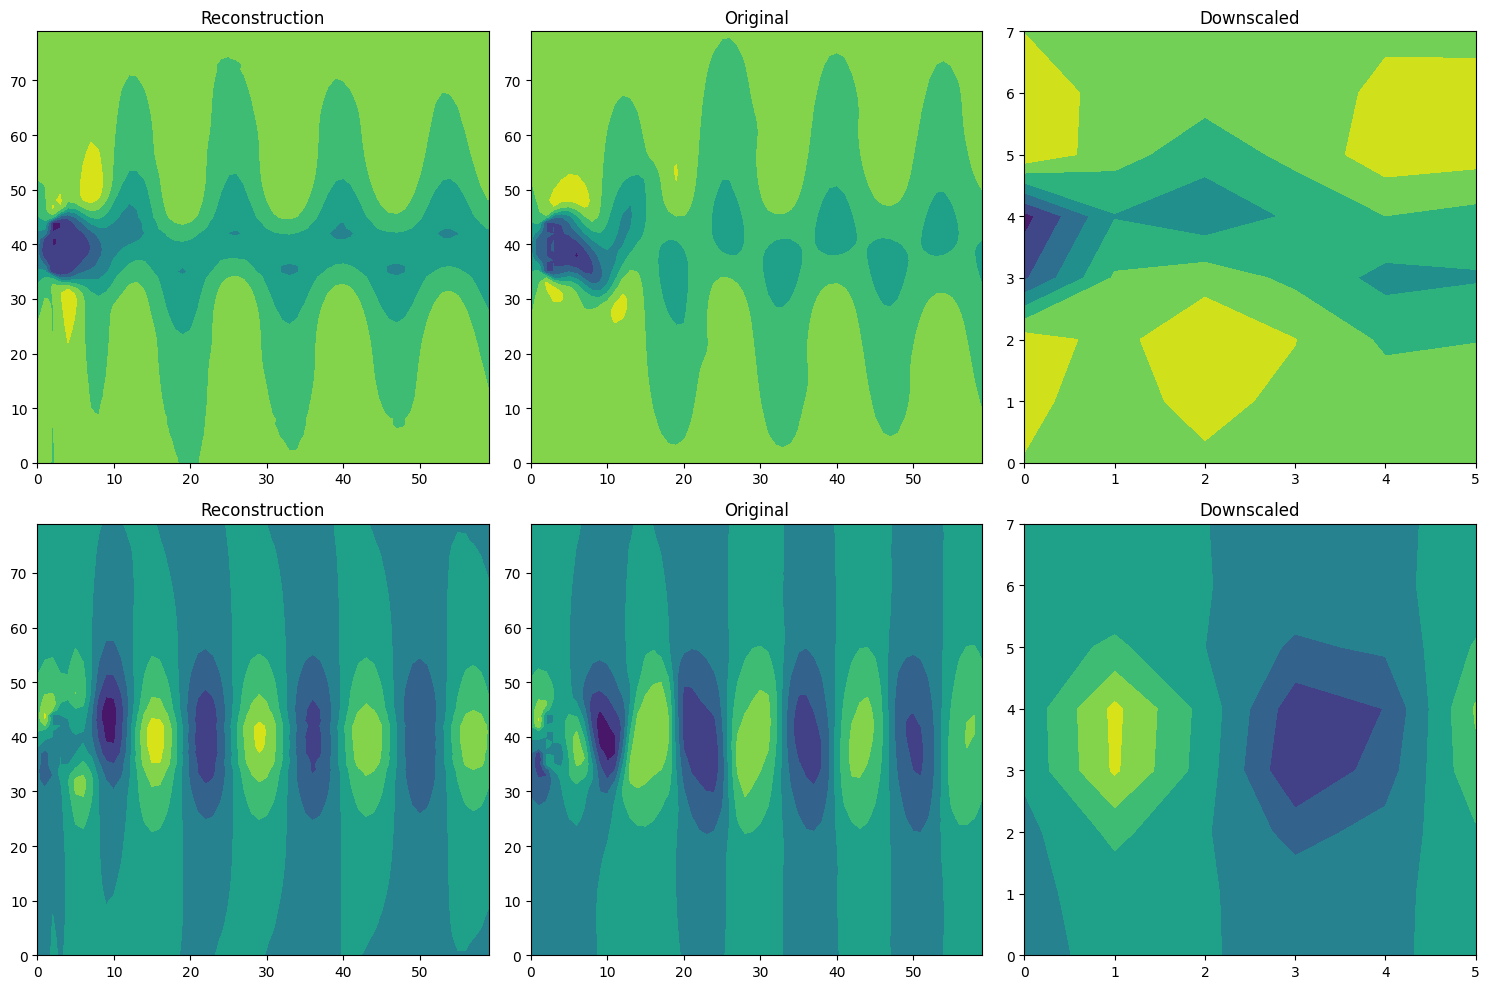

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].contourf(Rec_2[0, :, :, 0])
axes[0, 0].set_title('Reconstruction')

axes[0, 1].contourf(us_ten[0, :, :, 0])
axes[0, 1].set_title('Original')

axes[0, 2].contourf(ds_ten[0, :, :, 0])
axes[0, 2].set_title('Downscaled')

axes[1, 0].contourf(Rec_2[1, :, :, 0])
axes[1, 0].set_title('Reconstruction')

axes[1, 1].contourf(us_ten[1, :, :, 0])
axes[1, 1].set_title('Original')

axes[1, 2].contourf(ds_ten[1, :, :, 0])
axes[1, 2].set_title('Downscaled')

plt.tight_layout()

plt.show()

VKI EXPERIMENTAL RESULTS

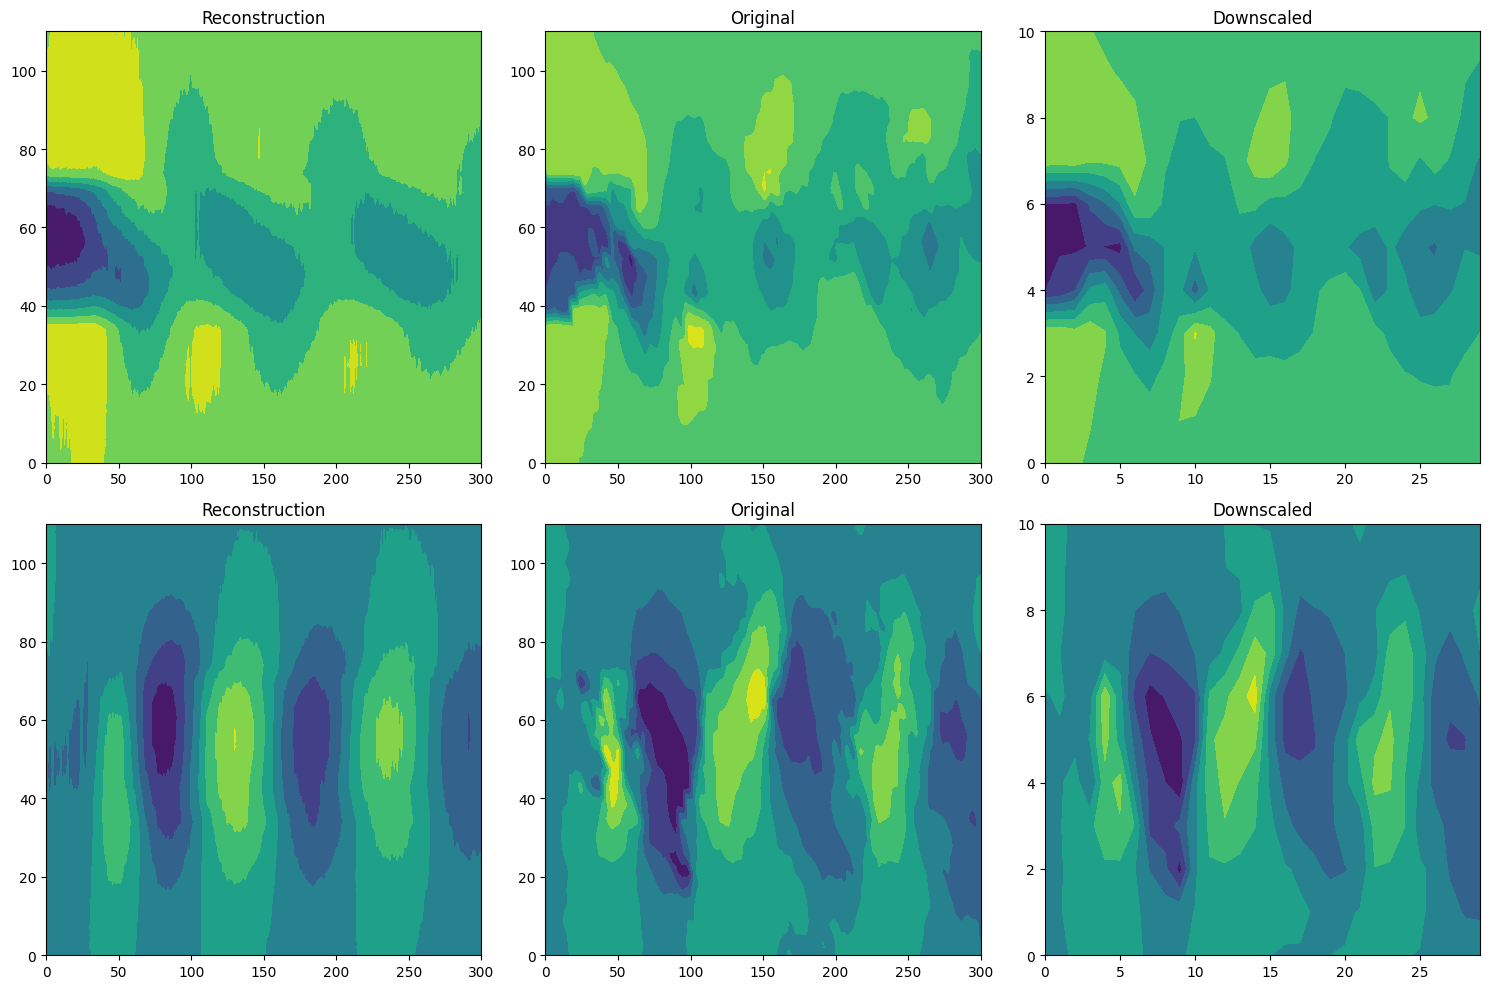

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].contourf(Rec_2[0, :, :, 0])
axes[0, 0].set_title('Reconstruction')

axes[0, 1].contourf(us_ten[0, :, :, 0])
axes[0, 1].set_title('Original')

axes[0, 2].contourf(ds_ten[0, :, :, 0])
axes[0, 2].set_title('Downscaled')

axes[1, 0].contourf(Rec_2[1, :, :, 0])
axes[1, 0].set_title('Reconstruction')

axes[1, 1].contourf(us_ten[1, :, :, 0])
axes[1, 1].set_title('Original')

axes[1, 2].contourf(ds_ten[1, :, :, 0])
axes[1, 2].set_title('Downscaled')

plt.tight_layout()

plt.show()

TWO-CONCENTRIC JETS WITH A BLUFF

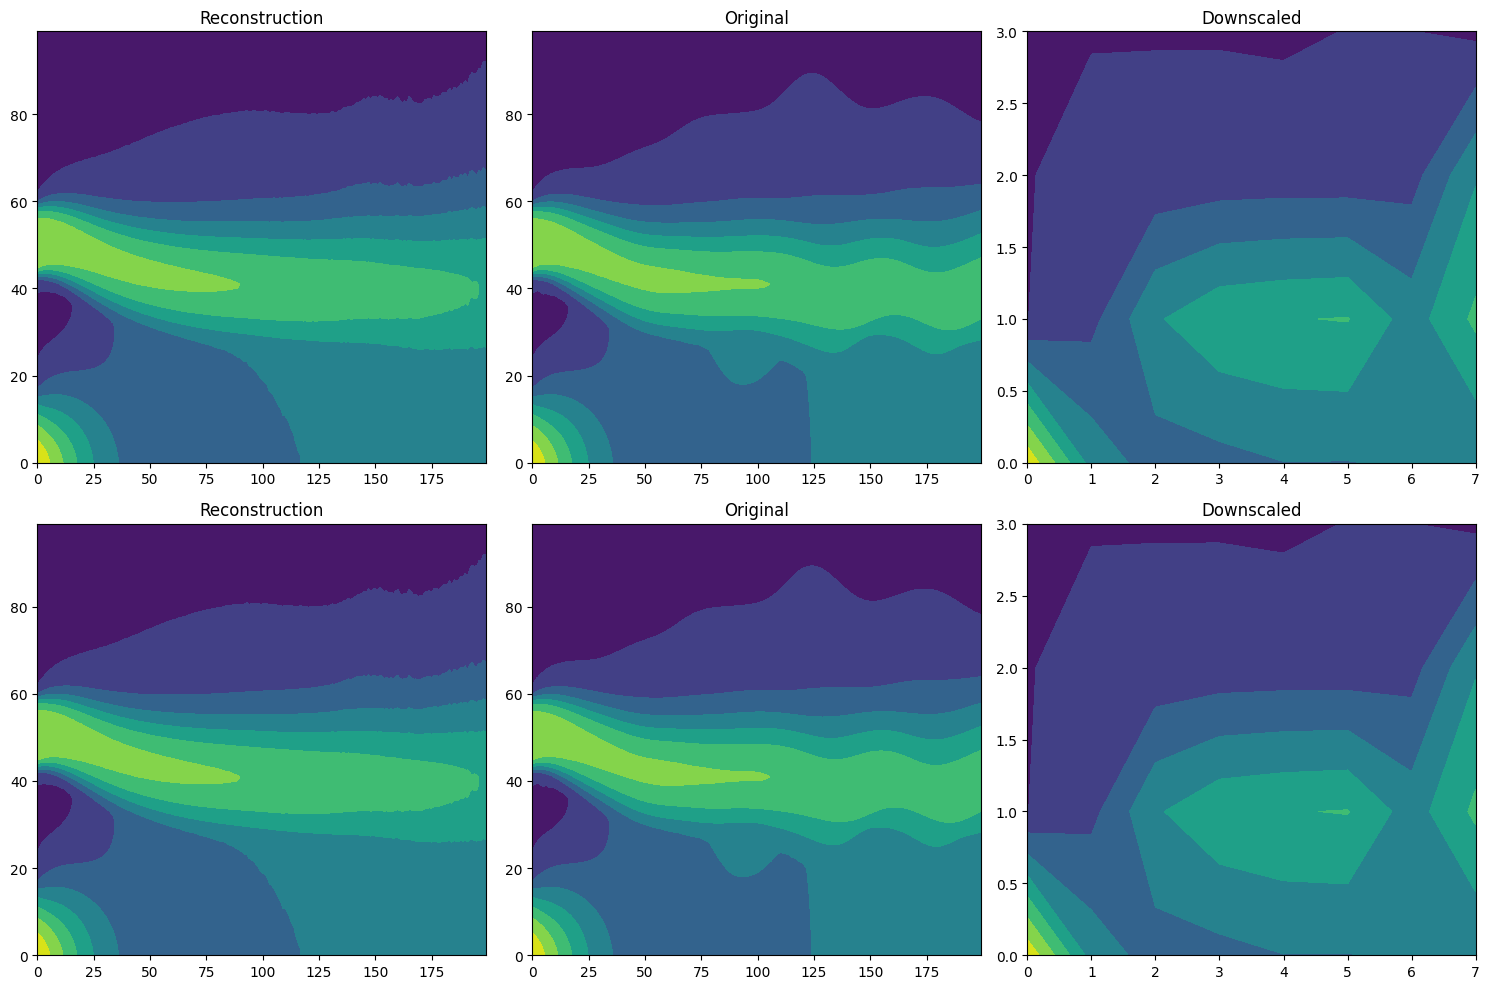

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].contourf(Rec_2[0, :, :, 0])
axes[0, 0].set_title('Reconstruction')

axes[0, 1].contourf(us_ten[0, :, :, 0])
axes[0, 1].set_title('Original')

axes[0, 2].contourf(ds_ten[0, :, :, 0])
axes[0, 2].set_title('Downscaled')

axes[1, 0].contourf(Rec_2[1, :, :, 0])
axes[1, 0].set_title('Reconstruction')

axes[1, 1].contourf(us_ten[1, :, :, 0])
axes[1, 1].set_title('Original')

axes[1, 2].contourf(ds_ten[1, :, :, 0])
axes[1, 2].set_title('Downscaled')

plt.tight_layout()

plt.show()